In [285]:
import numpy as np
import pandas as pd
import pprint
from pymystem3 import Mystem
import re
import nltk
from nltk.corpus import stopwords 
from tqdm import tqdm
import openpyxl

In [286]:
def display_df(df):
    pd.set_option('display.max_rows', None)
    display(df)
    pd.set_option('display.max_rows', 10)

In [287]:
'''
data_ksg = pd.read_csv('train_dataset_Дипстрой//dataset_ksg.csv', parse_dates=['ДатаНачалаЗадачи', 'ДатаОкончанияЗадачи',
                                                                                 'ДатаначалаБП0', 'ДатаокончанияБП0',
                                                                                 'date_report'])
'''
data_ksg = pd.read_csv(
    'train_dataset_Дипстрой//dataset_hackaton_ksg__v2__23062023__1710_GMT3.csv',
    encoding = "utf-8",
    sep=';',
    parse_dates=[
        'ДатаНачалаЗадачи',
        'ДатаОкончанияЗадачи',
        'ДатаначалаБП0',
        'ДатаокончанияБП0',
        'date_report'
    ],
    dtype = {'Экспертиза':'object'}
)

data_ksg = data_ksg.dropna(subset='Кодзадачи')
data_ksg = data_ksg.drop(columns=['Unnamed: 0'])

data_attr = pd.read_csv('train_dataset_Дипстрой//attr.csv')
data_ksg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059960 entries, 0 to 1060152
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   № п/п                    1059960 non-null  int64         
 1   obj_prg                  1059960 non-null  object        
 2   obj_subprg               1059960 non-null  object        
 3   obj_key                  1059960 non-null  object        
 4   Кодзадачи                1059960 non-null  object        
 5   НазваниеЗадачи           1059799 non-null  object        
 6   ПроцентЗавершенияЗадачи  1059960 non-null  float64       
 7   ДатаНачалаЗадачи         1059960 non-null  datetime64[ns]
 8   ДатаОкончанияЗадачи      1059960 non-null  datetime64[ns]
 9   ДатаначалаБП0            797152 non-null   datetime64[ns]
 10  ДатаокончанияБП0         800439 non-null   datetime64[ns]
 11  Статуспоэкспертизе       15781 non-null    float64       
 12  Экспе

In [288]:
#data_ksg[data_ksg['obj_prg']=='Здравоохранение']

In [289]:
'''
for key in data_ksg['obj_key'].unique():
    print(data_ksg[data_ksg['obj_key']==key]['obj_prg'].unique())
'''

"\nfor key in data_ksg['obj_key'].unique():\n    print(data_ksg[data_ksg['obj_key']==key]['obj_prg'].unique())\n"

In [290]:
data_ksg['obj_key'].unique()

array(['022-0527', '022-0354', '022-0513', '020-0684', '019-0589',
       '019-0594', '021-0548', '021-0550', '017-0520', '022-0171',
       '020-0776', '020-0149', '020-0712', '020-0719', '020-0779',
       '019-0431', '019-0676', '020-0711', '020-0157', '020-0709',
       '019-0429', '020-0156', '019-0428', '022-0170', '019-0430',
       '019-0675', '020-0710', '020-0720', '020-0708', '019-0478',
       '019-0483', '019-0481', '019-0480', '019-0477', '022-0172',
       '022-0592', '019-0469', '019-0475', '019-0464', '019-0471',
       '019-0467', '019-0474', '019-0463', '019-0472', '019-0470',
       '019-0473', '019-0465', '019-0466', '020-0683', '017-0527',
       '020-0155', '021-0048', '022-0176', '019-0674', '021-0781',
       '022-0522', '019-0668', '020-0151', '022-0517', '022-0519',
       '022-0518', '022-0043', '022-0629', '022-0631', '019-0476',
       '022-0520', '022-0528', '022-0524', '022-0526', '022-0355',
       '022-0525', '022-0515'], dtype=object)

In [291]:
nltk.download('stopwords') 
stop_words = list(stopwords.words('russian')) 
stop_words[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ykolt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что']

In [292]:
# Дропаем пропуски в данных с 'НазваниеЗадачи', 'Кодзадачи'
#data_ksg = data_ksg.dropna(subset = ['НазваниеЗадачи', 'Кодзадачи'])
#data_ksg['НазваниеЗадачи'] = data_ksg['НазваниеЗадачи'].fillna('')
data_ksg = data_ksg.dropna(subset='НазваниеЗадачи')
data_ksg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059799 entries, 0 to 1060152
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   № п/п                    1059799 non-null  int64         
 1   obj_prg                  1059799 non-null  object        
 2   obj_subprg               1059799 non-null  object        
 3   obj_key                  1059799 non-null  object        
 4   Кодзадачи                1059799 non-null  object        
 5   НазваниеЗадачи           1059799 non-null  object        
 6   ПроцентЗавершенияЗадачи  1059799 non-null  float64       
 7   ДатаНачалаЗадачи         1059799 non-null  datetime64[ns]
 8   ДатаОкончанияЗадачи      1059799 non-null  datetime64[ns]
 9   ДатаначалаБП0            797099 non-null   datetime64[ns]
 10  ДатаокончанияБП0         800278 non-null   datetime64[ns]
 11  Статуспоэкспертизе       15781 non-null    float64       
 12  Экспе

In [293]:
# Очистка данных
#data_ksg['НазваниеЗадачи'] = data_ksg['НазваниеЗадачи'].apply(lambda x : ' '.join(re.sub(r'[^а-яА-ЯёЁ]', ' ', x.lower()).split()))
#data_ksg['НазваниеЗадачи'] = data_ksg['НазваниеЗадачи'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data_ksg['new_obj_key'] = data_ksg['Кодзадачи'] + '_' + data_ksg['НазваниеЗадачи']

In [294]:
data_ksg['ПроцентЗавершенияЗадачи'].value_counts()

ПроцентЗавершенияЗадачи
0.0      601991
100.0    392060
99.0       3326
50.0       3315
5.0        2720
          ...  
16.0        158
26.0        150
21.0        132
27.0        128
24.0        122
Name: count, Length: 101, dtype: int64

In [295]:
def log (data):
    data_return = pd.DataFrame()
    for kod in data['new_obj_key'].unique():
        data_test = data[(data['new_obj_key']==kod)].copy()
        data_test['ДатаОкончанияЗадачиСледующая'] = data_test['ДатаОкончанияЗадачи'].shift(-1)
        data_test['target'] = (data_test['ДатаОкончанияЗадачиСледующая'] - data_test['ДатаОкончанияЗадачи']).dt.days
        data_return = pd.concat([data_return, data_test])
    return data_return


#data_test_2 = log(data_test)


def preproc_data (data):
    data_return = pd.DataFrame()
    for key in tqdm(data['obj_key'].unique()):
        data_test = data[data['obj_key']==key].copy()
        data_test = log(data_test)
        data_return = pd.concat([data_return, data_test])

    data_return = data_return.dropna(subset=['target'])
    return data_return


#data_test.drop(columns=['Статуспоэкспертизе', 'Экспертиза', 'ДатаначалаБП0', 'ДатаокончанияБП0'], inplace=True)
#data_test['ДатаОкончанияЗадачиСлудующая'] = data_test['ДатаОкончанияЗадачи'].shift(1)
#data_test['target'] = (data_test['ДатаОкончанияЗадачиСлудующая'] - data_test['ДатаОкончанияЗадачи'])
#data_test[(data_test['date_report']=='2023-01-17') & (data_test['Кодзадачи']=='3.15.0')]

In [296]:
data_ksg_new = preproc_data(data_ksg)
data_ksg_new

100%|██████████| 72/72 [05:35<00:00,  4.66s/it]


,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза,date_report,new_obj_key,ДатаОкончанияЗадачиСледующая,target
0,81,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,0.0,2022-01-14,2023-03-30,NaT,NaT,NaN,NaN,2023-01-17,1_Предпроектные работы,2023-04-27,28.0
47695,82,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,5.0,2022-01-14,2023-04-27,NaT,NaT,NaN,NaN,2023-01-23,1_Предпроектные работы,2023-04-27,0.0
96383,82,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,5.0,2022-01-14,2023-04-27,NaT,NaT,NaN,NaN,2023-02-06,1_Предпроектные работы,2023-04-27,0.0
148524,82,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,5.0,2022-01-14,2023-04-27,NaT,NaT,NaN,NaN,2023-02-13,1_Предпроектные работы,2023-04-27,0.0
203093,82,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,5.0,2022-01-14,2023-04-27,NaT,NaT,NaN,NaN,2023-02-20,1_Предпроектные работы,2023-04-27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964642,49,Образование,Дошкольные учреждения,022-0515,3.20,Разработка цифровой информационной модели (ЦИМ...,0.0,2023-11-12,2024-03-02,2023-10-12,2024-01-31,NaN,NaN,2023-05-22,3.20_Разработка цифровой информационной модели...,2024-03-02,0.0
964648,49,Образование,Дошкольные учреждения,022-0515,3.20.1,Разработка цифровой информационной модели (ЦИМ),0.0,2023-11-12,2024-03-02,2023-10-12,2024-01-31,NaN,NaN,2023-05-22,3.20.1_Разработка цифровой информационной моде...,2024-03-02,0.0
964654,49,Образование,Дошкольные учреждения,022-0515,3.20.2,Разработка цифровой информационной модели (ЦИМ...,0.0,2024-03-02,2024-03-02,2024-01-31,2024-01-31,NaN,NaN,2023-05-22,3.20.2_Разработка цифровой информационной моде...,2024-03-02,0.0
964659,49,Образование,Дошкольные учреждения,022-0515,3.21,Экспертиза цифровой информационной модели (ЦИМ...,0.0,2023-09-25,2023-10-22,2023-08-01,2023-08-23,NaN,NaN,2023-05-22,3.21_Экспертиза цифровой информационной модели...,2023-10-22,0.0


In [297]:
'''
excel_data = pd.read_excel('train_dataset_Дипстрой//kritics_task.xlsx')
# Read the values of the file in the dataframe
excel_data = pd.DataFrame(excel_data, columns=['Кодзадачи', 'НазваниеЗадачи'])
excel_data

data_ksg_new = data_ksg_new.loc[
    (data_ksg_new['Кодзадачи'].isin(excel_data['Кодзадачи'])) & 
    (data_ksg_new['НазваниеЗадачи'].isin(excel_data['НазваниеЗадачи']))
]
data_ksg_new
'''

"\nexcel_data = pd.read_excel('train_dataset_Дипстрой//kritics_task.xlsx')\n# Read the values of the file in the dataframe\nexcel_data = pd.DataFrame(excel_data, columns=['Кодзадачи', 'НазваниеЗадачи'])\nexcel_data\n\ndata_ksg_new = data_ksg_new.loc[\n    (data_ksg_new['Кодзадачи'].isin(excel_data['Кодзадачи'])) & \n    (data_ksg_new['НазваниеЗадачи'].isin(excel_data['НазваниеЗадачи']))\n]\ndata_ksg_new\n"

,target
count,998009.000000
mean,2.243004
std,44.212079
min,-1340.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1299.000000


<Axes: ylabel='Frequency'>

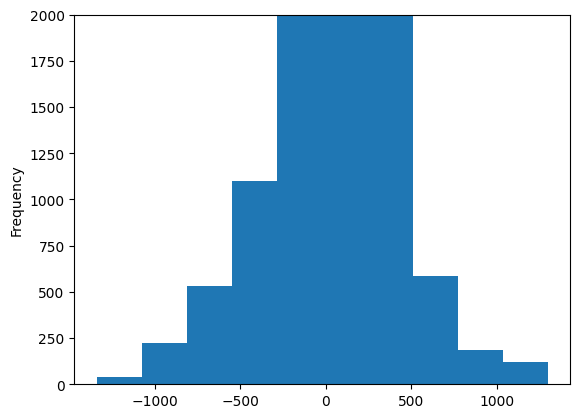

In [298]:

#display(data_ksg_new[(data_ksg_new['target']<730) & (data_ksg_new['target']>-730)][['target']].describe())
#data_ksg_new[(data_ksg_new['target']<730) & (data_ksg_new['target']>-730)]['target'].plot.hist(ylim=(0,2000))
display(data_ksg_new[['target']].describe())
data_ksg_new['target'].plot.hist(ylim=(0,2000)) 


In [266]:
display_df(data_ksg_new['target'].value_counts())

target
 0.0       851693
 7.0        13276
 10.0        4737
 1.0         4078
 14.0        4017
 8.0         3743
 15.0        3671
 2.0         3454
 5.0         3258
-1.0         2980
 6.0         2830
 4.0         2690
 35.0        2534
 18.0        2491
 3.0         2237
 16.0        2217
 21.0        2185
 25.0        2159
 13.0        2039
 11.0        2027
 23.0        2020
 9.0         1981
 28.0        1953
 12.0        1796
 17.0        1730
 31.0        1665
 20.0        1495
 49.0        1484
-20.0        1436
 19.0        1425
-11.0        1132
 77.0        1072
 29.0        1061
 24.0        1050
 26.0        1012
 30.0         993
 22.0         962
 27.0         959
-3.0          952
-6.0          883
-2.0          875
 36.0         842
-7.0          840
-9.0          806
-4.0          797
-5.0          756
-8.0          683
-27.0         669
 32.0         644
-14.0         634
-10.0         633
-34.0         610
 62.0         605
 33.0         602
-19.0         591
-13

<Axes: >

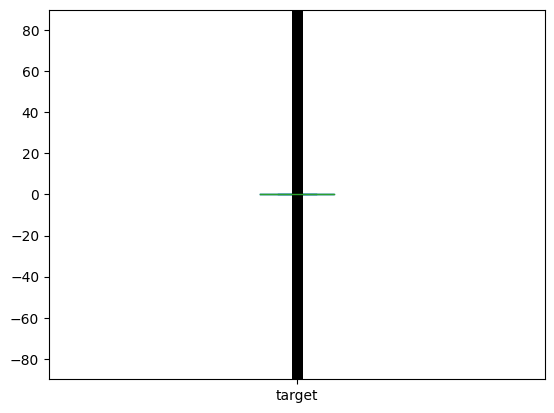

In [251]:
data_ksg_new['target'].plot.box(ylim=(-90,90))

In [299]:
print(np.percentile (data_ksg_new['target'] , 99))
print(np.percentile (data_ksg_new['target'] , 1))

106.0
-56.0


In [264]:
data_ksg_new[(data_ksg_new['target']>106)] # obj_key = 022-0354   Кодзадачи = 1.5

,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза,date_report,new_obj_key,ДатаОкончанияЗадачиСледующая,target
767020,84,Образование,Общеобразовательные учреждения,022-0527,1,Предпроектные работы,16.0,2022-05-16,2023-04-27,2022-05-16,2023-04-27,NaN,NaN,2023-05-02,1_Предпроектные работы,2023-08-28,123.0
767629,84,Образование,Общеобразовательные учреждения,022-0527,1.4,Договор аренды земельного участка (ДАЗУ),0.0,2022-05-16,2023-04-27,2022-05-16,2023-04-27,NaN,NaN,2023-05-02,1.4_Договор аренды земельного участка (ДАЗУ),2023-08-28,123.0
767696,84,Образование,Общеобразовательные учреждения,022-0527,1.4.1,Заключение ДАЗУ сроком действия 11.28 (при нео...,0.0,2022-05-16,2022-12-09,2022-05-16,2022-12-09,NaN,NaN,2023-05-02,1.4.1_Заключение ДАЗУ сроком действия 11.28 (п...,2023-06-26,199.0
767727,84,Образование,Общеобразовательные учреждения,022-0527,1.4.2,Заключение ДАЗУ на период строительства,0.0,2023-01-09,2023-04-27,2023-01-09,2023-04-27,NaN,NaN,2023-05-02,1.4.2_Заключение ДАЗУ на период строительства,2023-08-28,123.0
767787,84,Образование,Общеобразовательные учреждения,022-0527,1.4.3,ДАЗУ заключен,0.0,2023-04-27,2023-04-27,2023-04-27,2023-04-27,NaN,NaN,2023-05-02,1.4.3_ДАЗУ заключен,2023-08-28,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895902,49,Образование,Дошкольные учреждения,022-0515,3.14.1,Передача ПД,0.0,2023-10-27,2023-11-09,NaT,NaT,NaN,NaN,2023-05-15,3.14.1_Передача ПД,2024-02-29,112.0
895961,49,Образование,Дошкольные учреждения,022-0515,3.14.2,Утверждение,0.0,2023-11-10,2023-11-16,NaT,NaT,NaN,NaN,2023-05-15,3.14.2_Утверждение,2024-03-07,112.0
618414,49,Образование,Дошкольные учреждения,022-0515,3.7,Архитектурно-градостроительные решения,0.0,2023-05-11,2023-06-21,NaT,NaT,NaN,NaN,2023-04-10,3.7_Архитектурно-градостроительные решения,2023-10-25,126.0
618544,49,Образование,Дошкольные учреждения,022-0515,3.7.2,Согласование,0.0,2023-06-01,2023-06-21,NaT,NaT,NaN,NaN,2023-04-10,3.7.2_Согласование,2023-10-25,126.0


In [244]:
data_ksg_new[(data_ksg_new['obj_key'] == '022-0354') & (data_ksg_new['Кодзадачи'] =='10.1.1.22')]

,№ п/п,obj_prg,obj_subprg,obj_key,Кодзадачи,НазваниеЗадачи,ПроцентЗавершенияЗадачи,ДатаНачалаЗадачи,ДатаОкончанияЗадачи,ДатаначалаБП0,ДатаокончанияБП0,Статуспоэкспертизе,Экспертиза,date_report,new_obj_key,ДатаОкончанияЗадачиСледующая,target
1359,75,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2024-12-18,2024-12-18,2024-12-18,2024-12-18,NaN,NaN,2023-01-17,10.1.1.22_Акт приемки внутреннего газопровода ...,2022-01-14,-1069.0
49030,77,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2022-01-14,2022-01-14,2024-12-18,2024-12-18,NaN,NaN,2023-01-23,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-01-14,1096.0
97793,77,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-01-14,2025-01-14,2024-12-18,2024-12-18,NaN,NaN,2023-02-06,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,114.0
149967,77,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2024-12-18,2024-12-18,NaN,NaN,2023-02-13,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0
204533,77,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2024-12-18,2024-12-18,NaN,NaN,2023-02-20,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710155,79,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2025-05-08,2025-05-08,NaN,NaN,2023-04-24,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0
768564,79,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2025-05-08,2025-05-08,NaN,NaN,2023-05-02,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0
827139,79,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2025-05-08,2025-05-08,NaN,NaN,2023-05-10,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0
885689,79,Образование,Общеобразовательные учреждения,022-0354,10.1.1.22,Акт приемки внутреннего газопровода (форма Мос...,0.0,2025-05-08,2025-05-08,2025-05-08,2025-05-08,NaN,NaN,2023-05-15,10.1.1.22_Акт приемки внутреннего газопровода ...,2025-05-08,0.0


In [158]:
display_df(data_ksg['obj_key'].value_counts().to_frame().sort_index())

,count
obj_key,
017-0520,11381
017-0527,9139
019-0428,19326
019-0429,18744
019-0430,17693
019-0431,17182
019-0463,16812
019-0464,12863
019-0465,21258


In [159]:
#display_df(data_test['НазваниеЗадачи'].value_counts().to_frame().sort_index())

#pd.set_option('display.max_rows', None)

In [160]:
#data_test_2[data_test_2['Кодзадачи']=='6']
#data_test_2